# custom classification problem

## imports

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

## data
The data we're trying to classify will consist of 2 datasets. One will be a small square centered at 0, 0. The other will consist of a border surrouding the inner square.

In [28]:
class1_size = 500
class1_radius = 3
class2_size = 500

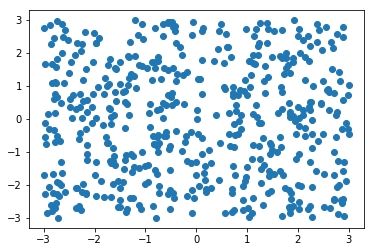

In [29]:
features1 = np.random.uniform(low=-class1_radius, high=class1_radius, size=(class1_size, 2))
plt.plot(features1[:,0], features1[:,1], "o")

In [119]:
def get_features2(num_points=10, point_lim=100, top_left=[-1, 1], bottom_right=[-1, 1]):
    """
    Attempts to get num_points random data points that exist
    outside of the box described by top_left, bottom_right. The
    function will continue until num_points have been acquired or
    until point_lim has been reached. If point_lim is reached,
    the data points acquired so far will be returned.
    :param num_points: Desired number of data points
    :param point_lim: Desired stopping criteria for total points
        (including invalid points) generated
    :param top_left: Describes the top_left of the inner box in
        [] indexable form
    :param top_right: Describes the top_right of the inner box in
        [] indexable form
    """
    #outer bounds for data array
    top_left_bound = [e * 2 for e in top_left]
    bottom_right_bound = [e * 2 for e in bottom_right]
    max_x = np.max([np.abs(top_left_bound[0]), np.abs(bottom_right_bound[0])])
    max_y = np.max([np.abs(top_left_bound[1]), np.abs(bottom_right_bound[1])])
    print(top_left, bottom_right)
    print(top_left_bound, bottom_right_bound)
    print(max_x, max_y)
    #inner bounds are described by top_left and bottom_right
    
    points = []
    #collect points
    for i in range(point_lim):
        px = np.random.uniform(low=-max_x, high=max_x)
        py = np.random.uniform(low=-max_y, high=max_y)
        
        #check if point valid
        valid_x = px < top_left[0] or bottom_right[0] < px
        valid_y = top_left[1] < px or px < bottom_right[1]
        if valid_y or valid_x:
            points.append([px, py])
        
        #check if enough points
        if len(points) == num_points:
            break
    return np.asarray(points)

[-3, 3] [3, -3]
[-6, 6] [6, -6]
6 6


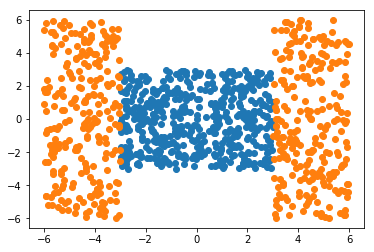

In [120]:
features2 = get_features2(
    num_points=class2_size,
    point_lim=2*class2_size,
    top_left=[-class1_radius, class1_radius],
    bottom_right=[class1_radius, -class1_radius]
)
plt.plot(features1[:,0], features1[:,1], "o", label="inner")
plt.plot(features2[:,0], features2[:,1], "o", label="outer")